# Simulación en R aplicada a\\ la Ley de los Grandes Números y\\ Teorema Central del Límite

|       Nombre      | Libreta |
|:-----------------:|:-------:|
| Florencia Zanollo |  934/11 |
| Christian Murga   |  982/12 |

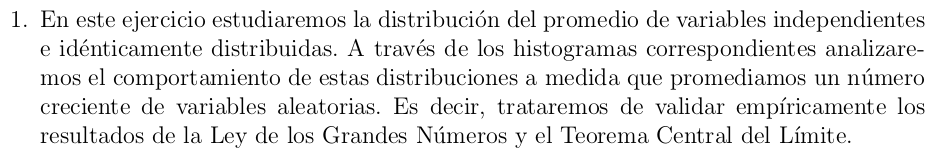

In [22]:
#semilla
set.seed(1234)

#librerias utilizadas
library(ggplot2)

#funciones auxiliares
make_histogram = function(datos){
    df = data.frame(x = datos)
    ggplot(df, aes(x)) + geom_histogram(binwidth=0.09, color="black", fill="white")
}

## a) 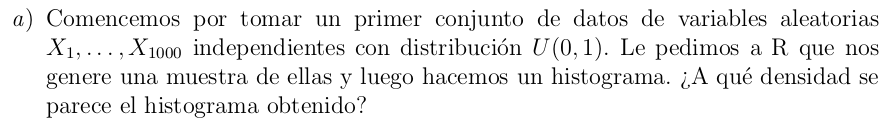

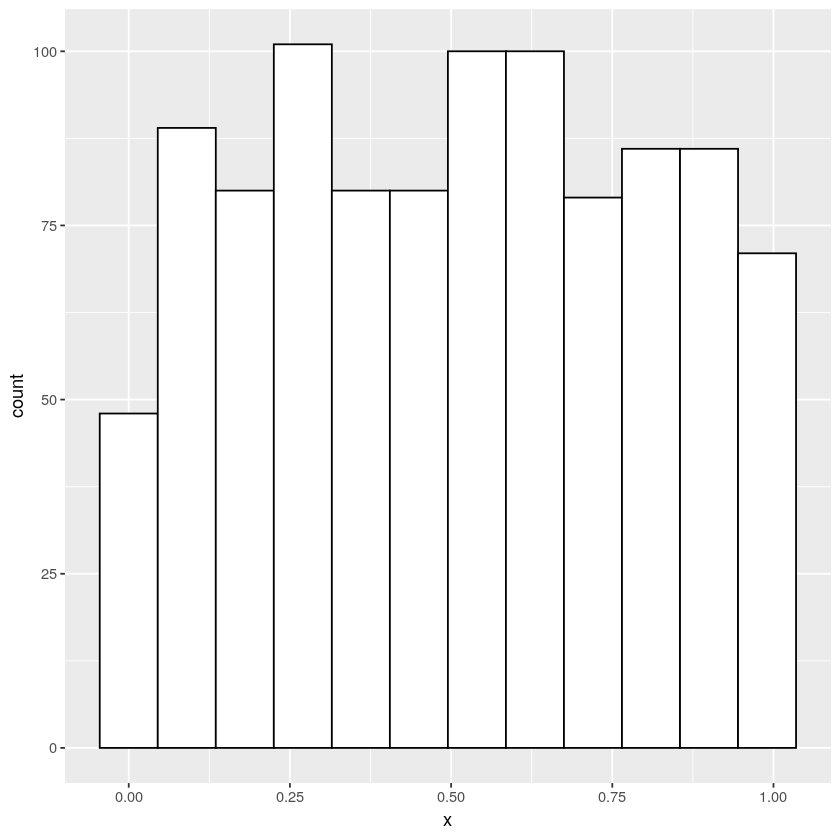

In [2]:
a_datos = runif(1000)
make_histogram(a_datos)

Tiene pinta de... Uniforme medio mordida?

## b) 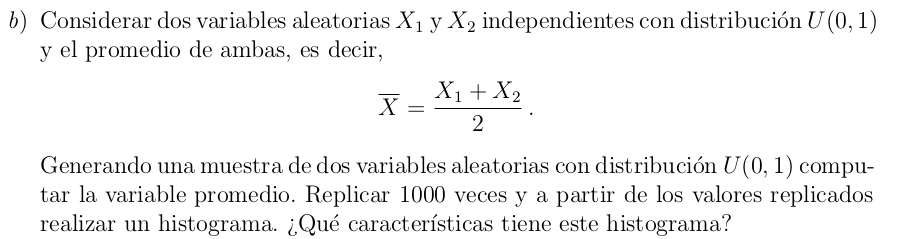

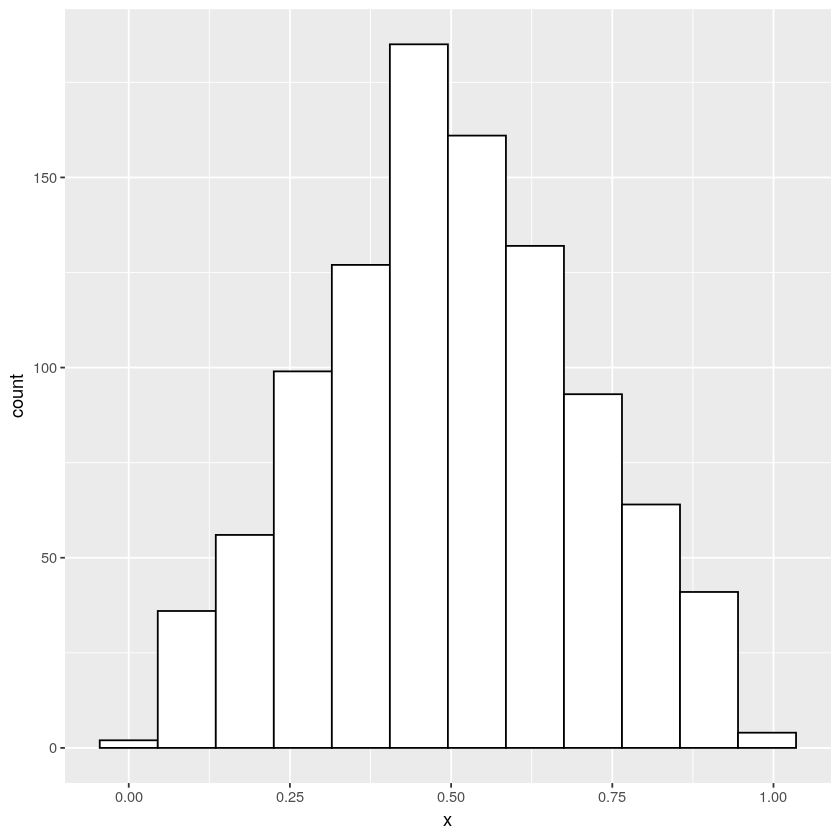

In [3]:
b_datos = replicate(1000, {mean(runif(2))})
make_histogram(b_datos)

## c) 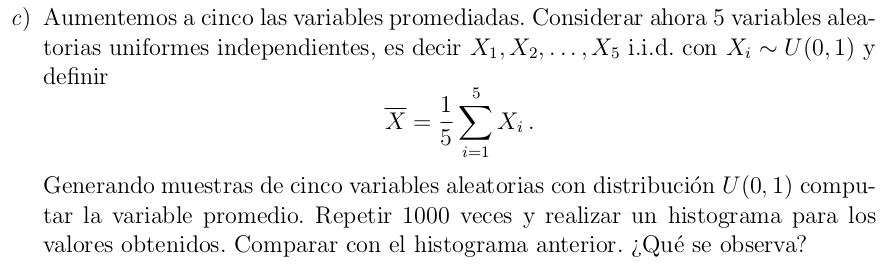

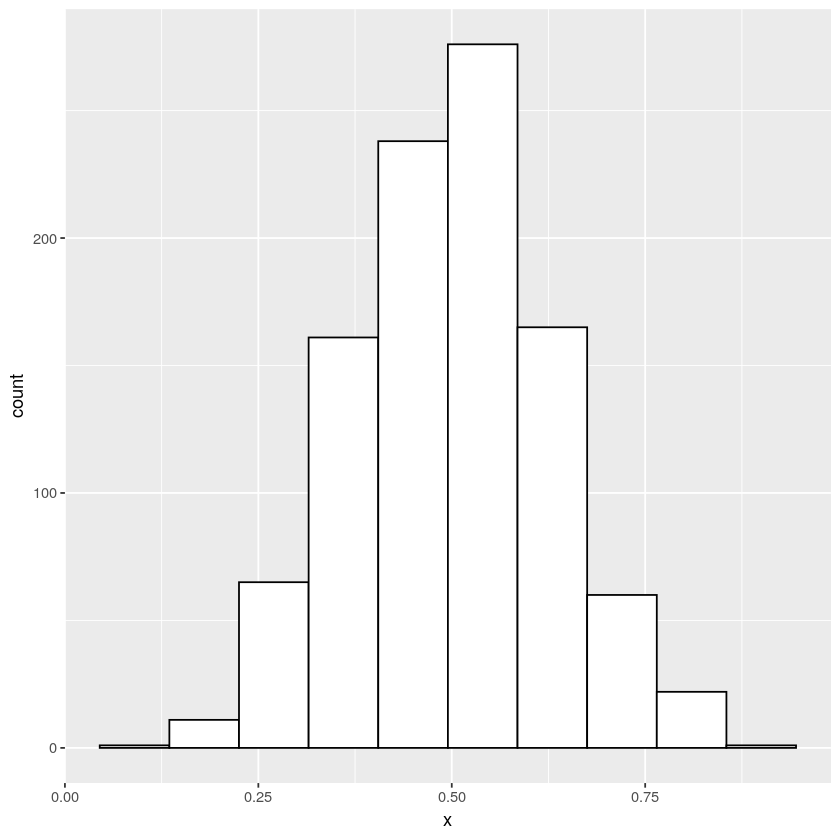

In [4]:
c_datos = replicate(1000, {mean(runif(5))})
make_histogram(c_datos)

## d) 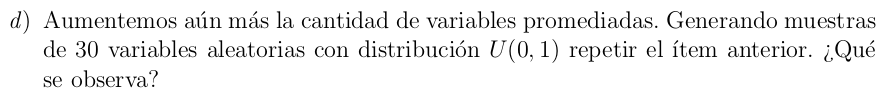

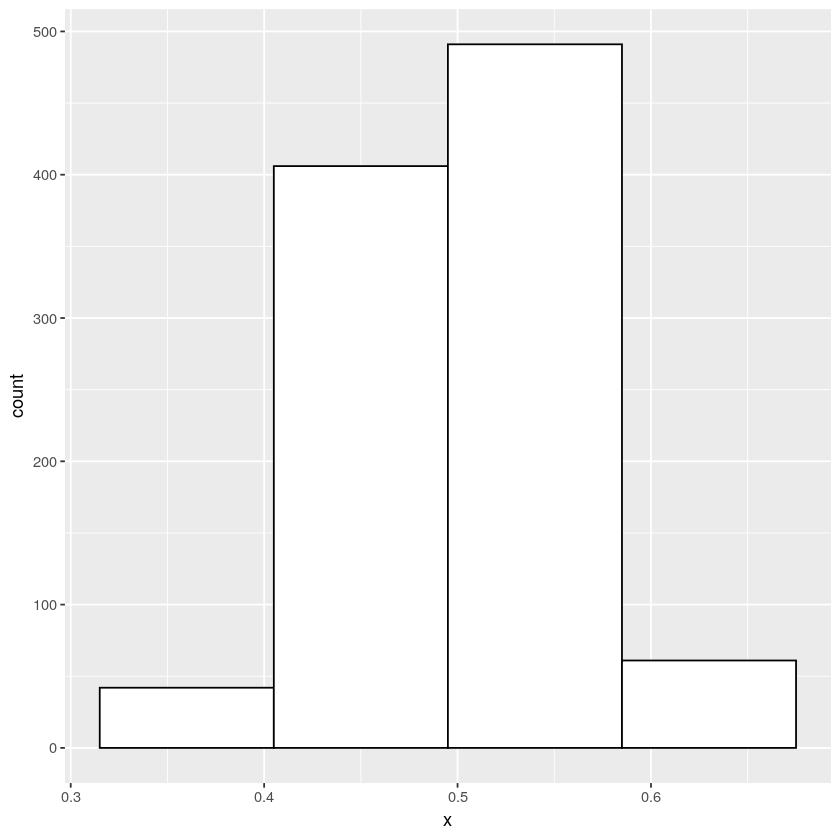

In [5]:
d_datos = replicate(1000, {mean(runif(30))})
make_histogram(d_datos)

Que se observa?

## e) 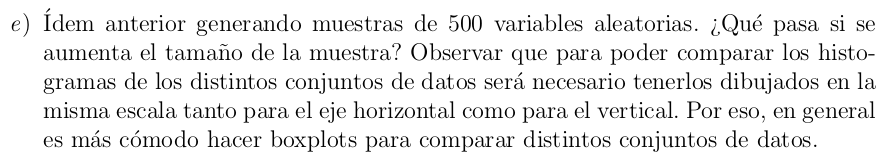

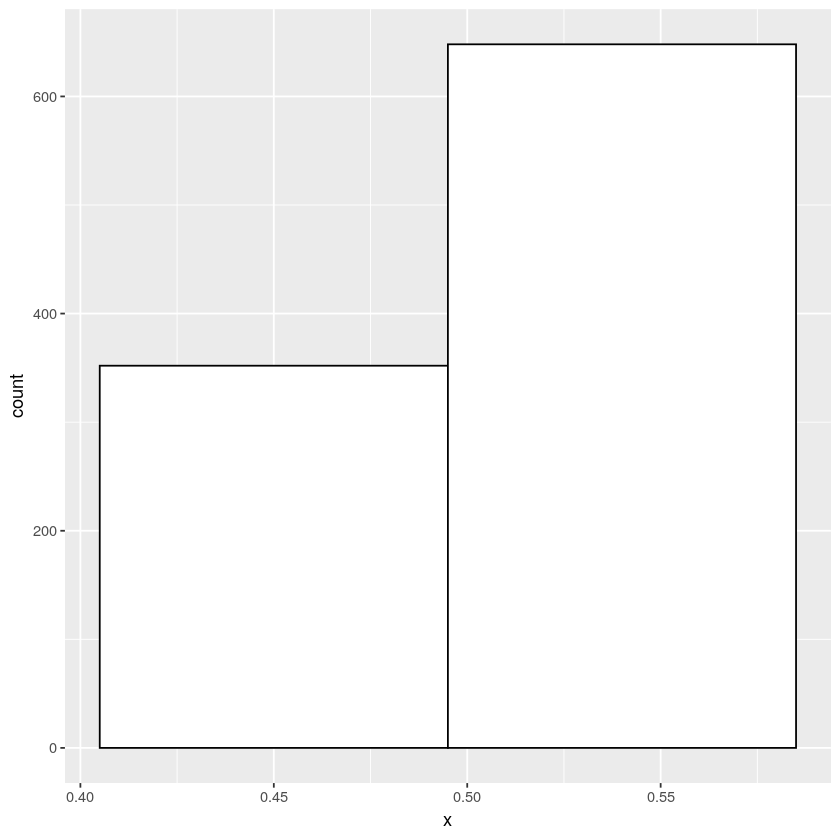

In [6]:
e_datos = replicate(1000, {mean(runif(500))})
make_histogram(e_datos)

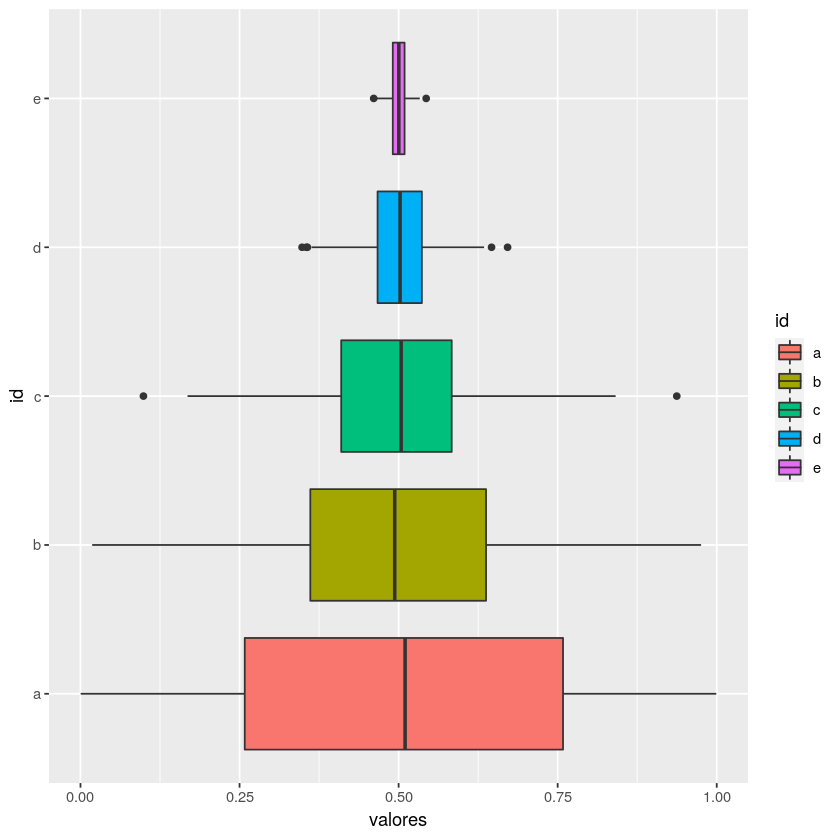

In [21]:
dat = data.frame(valores=c(a_datos, b_datos, c_datos, d_datos, e_datos), id=rep(c('a','b','c','d','e'),each=1000))

ggplot(dat, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip()

## f) 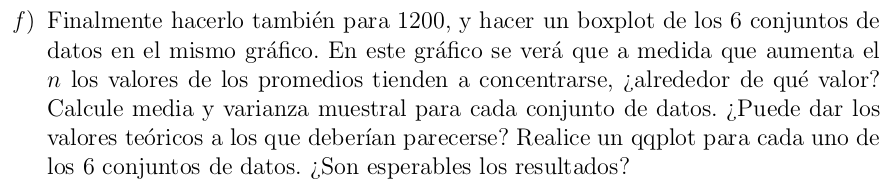

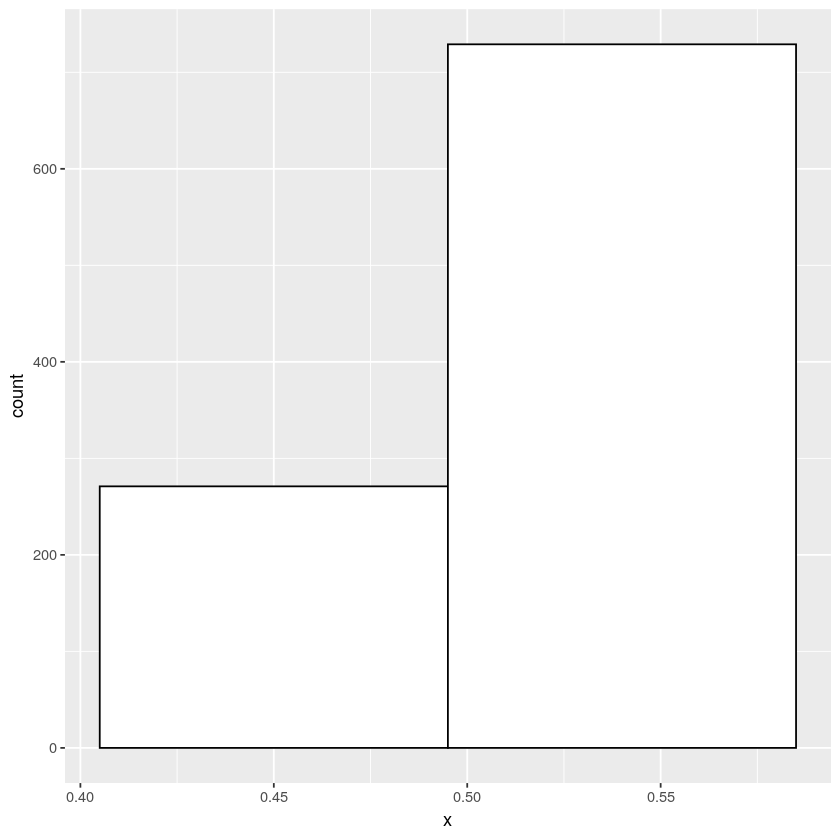

In [23]:
f_datos = replicate(1000, {mean(runif(1200))})
make_histogram(f_datos)

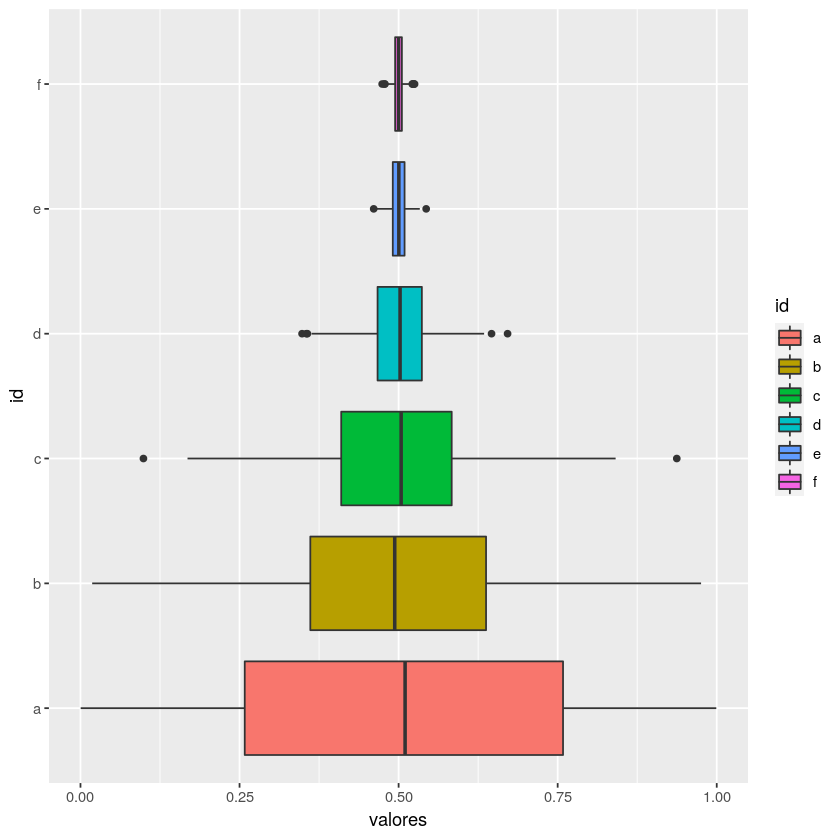

In [24]:
dat = data.frame(valores=c(a_datos, b_datos, c_datos, d_datos, e_datos, f_datos), id=rep(c('a','b','c','d','e','f'),each=1000))

ggplot(dat, aes(x=id, y=valores, fill=id)) + 
  geom_boxplot() + coord_flip()

Se concentran alrededor de 0.5

TODO: Calcule media y varianza muestral para cada conjunto de datos. ¿Puede dar los
valores teóricos a los que deberı́an parecerse? Realice un qqplot para cada uno de
los 6 conjuntos de datos. ¿Son esperables los resultados?

## g) 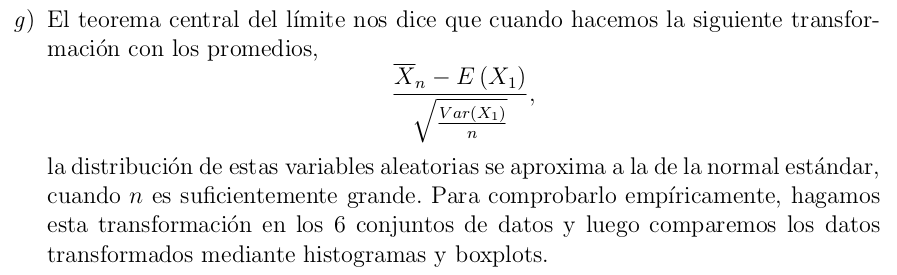

## h) 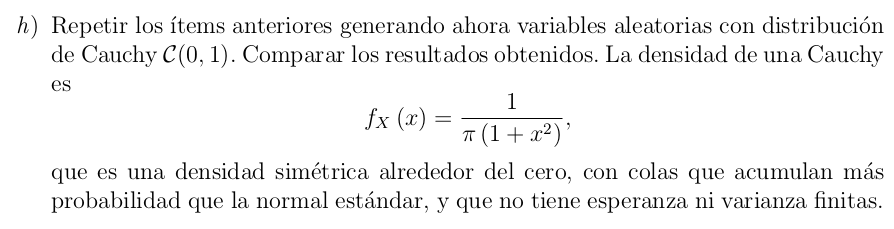